# Visualizing BO results

## Feature selection comparison mordred vs. rdkit

In [37]:
import numpy as np

In [38]:
#load the data for ground truth checking
from data_helper import load_lipo_feat
X, y = load_lipo_feat(filename='data/lipo_{}.csv'.format('rdkit'))

# count the number of molecules added in each iteration are above the threshold
def hit_count(y, threshold, mol_added):
    num_trial = len(mol_added)
    num_iter = len(mol_added[0])
    hit_count = np.zeros((num_trial,num_iter))
    for trial in range(num_trial):
        mol_above_threshold = []
        counter = 0
        for mol_index in mol_added[trial]:
            if y[int(mol_index)] > threshold:
                counter += 1
            mol_above_threshold.append(counter)
        hit_count[trial] = mol_above_threshold
    return hit_count



In [39]:
# pca retain var of 0.9 results in 46 components for rdkit and 50 for mordred
rdkit_gprq_pca9 = np.load('./results/fair_split_trial50_pca0.9/lipo_rdkit_ratio0.1_iter20_trial50GPRQ.npy', allow_pickle=True).item()
mordred_gprq_pca9 = np.load('./results/fair_split_trial50_pca0.9/lipo_mordred_ratio0.1_iter20_trial50GPRQ.npy', allow_pickle=True).item()
rdkit_gprq_pca8 = np.load('./results/fair_split_trial50_pca0.8/lipo_rdkit_ratio0.1_iter20_trial50GPRQ.npy', allow_pickle=True).item()
mordred_gprq_pca8 = np.load('./results/fair_split_trial50_pca0.8/lipo_mordred_ratio0.1_iter20_trial50GPRQ.npy', allow_pickle=True).item()
ecfp_tanimoto_pca9 = np.load('./results/fair_split_trial50_pca0.9/lipo_ecfp_ratio0.1_iter20_trial50GPTanimoto.npy', allow_pickle=True).item()
ecfp_tanimoto_pca8 = np.load('./results/fair_split_trial50_pca0.8/lipo_ecfp_ratio0.1_iter20_trial50GPTanimoto.npy', allow_pickle=True).item()
e3fp_tanimoto_pca9 = np.load('./results/fair_split_trial50_pca0.9/lipo_e3fp_ratio0.1_iter20_trial50GPTanimoto.npy', allow_pickle=True).item()
e3fp_tanimoto_pca8 = np.load('./results/fair_split_trial50_pca0.8/lipo_e3fp_ratio0.1_iter20_trial50GPTanimoto.npy', allow_pickle=True).item()
mol2vec_gprq_pca9 = np.load('./results/fair_split_trial50_pca0.9/lipo_mol2vec_ratio0.1_iter20_trial50GPRQ.npy', allow_pickle=True).item()
mol2vec_gprq_pca8 = np.load('./results/fair_split_trial50_pca0.8/lipo_mol2vec_ratio0.1_iter20_trial50GPRQ.npy', allow_pickle=True).item()

In [41]:
num_trial = len(rdkit_gprq_pca9['bests_over_trials'])
num_iter = len(rdkit_gprq_pca9['bests_over_trials'][0])

rdkit_gprq_pca9_best_observed = np.array(rdkit_gprq_pca9['bests_over_trials'])
mordred_gprq_pca9_best_observed = np.array(mordred_gprq_pca9['bests_over_trials'])
ecfp_tanimoto_pca9_best_observed = np.array(ecfp_tanimoto_pca9['bests_over_trials'])
e3fp_tanimoto_pca9_best_observed = np.array(e3fp_tanimoto_pca9['bests_over_trials'])
mol2vec_gprq_pca9_best_observed = np.array(mol2vec_gprq_pca9['bests_over_trials'])
rdkit_gprq_pca8_best_observed = np.array(rdkit_gprq_pca8['bests_over_trials'])
mordred_gprq_pca8_best_observed = np.array(mordred_gprq_pca8['bests_over_trials'])
ecfp_tanimoto_pca8_best_observed = np.array(ecfp_tanimoto_pca8['bests_over_trials'])
e3fp_tanimoto_pca8_best_observed = np.array(e3fp_tanimoto_pca8['bests_over_trials'])
mol2vec_gprq_pca8_best_observed = np.array(mol2vec_gprq_pca8['bests_over_trials'])


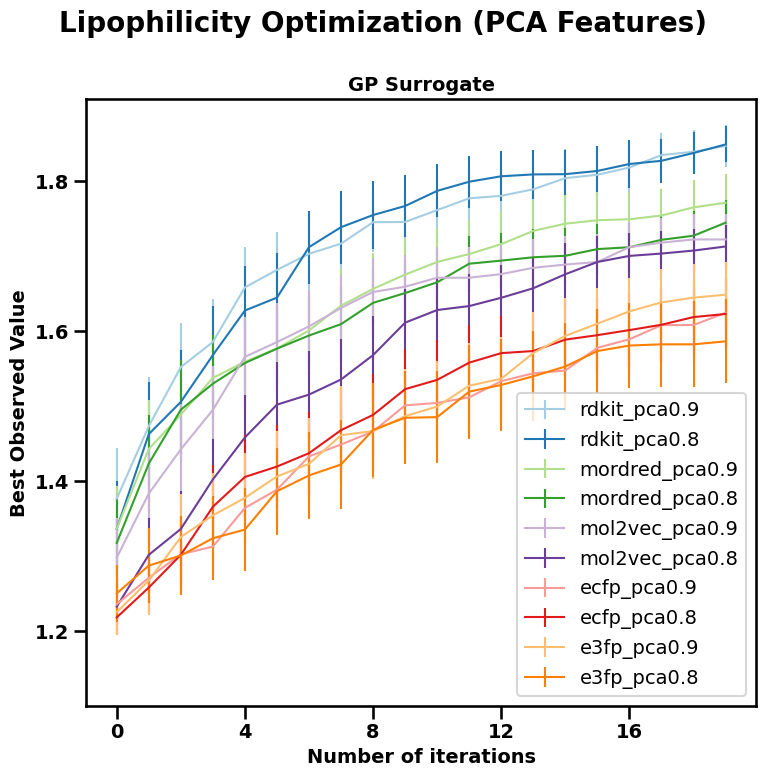

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
def ci(y):
    return 1.96 * y.std(axis=0) / np.sqrt(num_trial)
#set seaborn style
sns.set_context("talk")

colors = sns.color_palette("Paired", n_colors=12)
#plot the df data and add 
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
#plot errorbar from the mean and std of the best observed value
ax.errorbar(x=np.arange(num_iter), y=rdkit_gprq_pca9_best_observed.mean(axis=0), yerr=ci(rdkit_gprq_pca9_best_observed), label="rdkit_pca0.9", color = colors[0] ,linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=rdkit_gprq_pca8_best_observed.mean(axis=0), yerr=ci(rdkit_gprq_pca8_best_observed), label="rdkit_pca0.8", color = colors[1], linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mordred_gprq_pca9_best_observed.mean(axis=0), yerr=ci(mordred_gprq_pca9_best_observed), label="mordred_pca0.9", color = colors[2],linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mordred_gprq_pca8_best_observed.mean(axis=0), yerr=ci(mordred_gprq_pca8_best_observed), label="mordred_pca0.8",color = colors[3], linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mol2vec_gprq_pca9_best_observed.mean(axis=0), yerr=ci(mol2vec_gprq_pca9_best_observed), label="mol2vec_pca0.9", color = colors[8],linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mol2vec_gprq_pca8_best_observed.mean(axis=0), yerr=ci(mol2vec_gprq_pca8_best_observed), label="mol2vec_pca0.8", color = colors[9],linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=ecfp_tanimoto_pca9_best_observed.mean(axis=0), yerr=ci(ecfp_tanimoto_pca9_best_observed), label="ecfp_pca0.9", color = colors[4],linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=ecfp_tanimoto_pca8_best_observed.mean(axis=0), yerr=ci(ecfp_tanimoto_pca8_best_observed), label="ecfp_pca0.8", color = colors[5],linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=e3fp_tanimoto_pca9_best_observed.mean(axis=0), yerr=ci(e3fp_tanimoto_pca9_best_observed), label="e3fp_pca0.9", color = colors[6],linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=e3fp_tanimoto_pca8_best_observed.mean(axis=0), yerr=ci(e3fp_tanimoto_pca8_best_observed), label="e3fp_pca0.8", color = colors[7],linewidth=1.5)



plt.xticks(range(0,20))

#set labels
ax.set(
    xlabel="Number of iterations",
    ylabel="Best Observed Value",
)
ax.set_ylim(bottom=1.1)
ax.legend(loc="lower right",fontsize=14)

#make both plots for publication quality, set font size, thinkness and color
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_color("black")
    item.set_weight("bold")

#reduce the number of ticks
plt.locator_params(axis='y', nbins=5)
ax.locator_params(axis='x', nbins=5)
#set subtitle for each subplot
ax.title.set_text('GP Surrogate')
#set title for the whole plot
plt.suptitle('Lipophilicity Optimization (PCA Features)', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/result2.png')
plt.show()

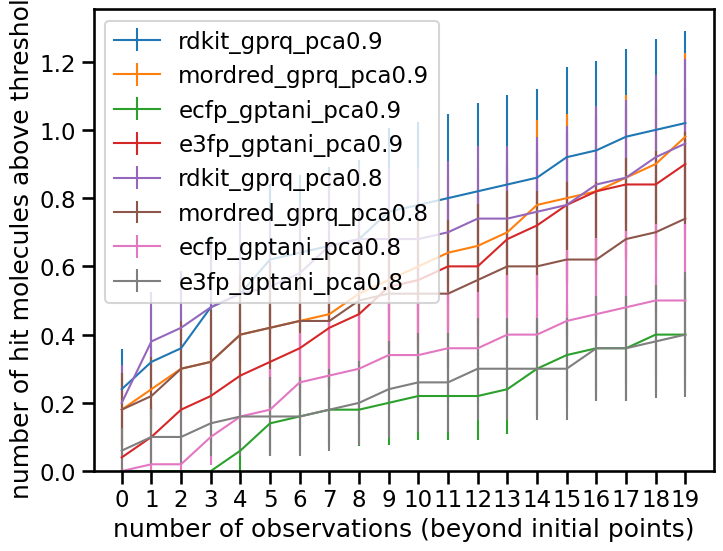

In [36]:
lipo_threshold = 1.6
# count the number of molecules added in each iteration are above the threshold
rdkit_gprq_pca9_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=rdkit_gprq_pca9['mol_added'])
mordred_gprq_pca9_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=mordred_gprq_pca9['mol_added'])
ecfp_tanimoto_pca9_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=ecfp_tanimoto_pca9['mol_added'])
e3fp_tanimoto_pca9_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=e3fp_tanimoto_pca9['mol_added'])
#mol2vec_gprq_pca9_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=mol2vec_gprq_pca9['mol_added'])
rdkit_gprq_pca8_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=rdkit_gprq_pca8['mol_added'])
mordred_gprq_pca8_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=mordred_gprq_pca8['mol_added'])
ecfp_tanimoto_pca8_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=ecfp_tanimoto_pca8['mol_added'])
e3fp_tanimoto_pca8_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=e3fp_tanimoto_pca8['mol_added'])
#mol2vec_gprq_pca8_hit_count = hit_count(y, threshold=lipo_threshold, mol_added=mol2vec_gprq_pca8['mol_added'])

#plot the df data and add 
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#plot errorbar from the mean and std of the best observed value
ax.errorbar(x=np.arange(num_iter), y=rdkit_gprq_pca9_hit_count.mean(axis=0), yerr=ci(rdkit_gprq_pca9_hit_count), label="rdkit_gprq_pca0.9", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mordred_gprq_pca9_hit_count.mean(axis=0), yerr=ci(mordred_gprq_pca9_hit_count), label="mordred_gprq_pca0.9", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=ecfp_tanimoto_pca9_hit_count.mean(axis=0), yerr=ci(ecfp_tanimoto_pca9_hit_count), label="ecfp_gptani_pca0.9", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=e3fp_tanimoto_pca9_hit_count.mean(axis=0), yerr=ci(e3fp_tanimoto_pca9_hit_count), label="e3fp_gptani_pca0.9", linewidth=1.5)
#ax.errorbar(x=np.arange(num_iter), y=mol2vec_gprq_pca9_hit_count.mean(axis=0), yerr=ci(mol2vec_gprq_pca9_hit_count), label="mol2vec_gprq_pca0.9", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=rdkit_gprq_pca8_hit_count.mean(axis=0), yerr=ci(rdkit_gprq_pca8_hit_count), label="rdkit_gprq_pca0.8", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=mordred_gprq_pca8_hit_count.mean(axis=0), yerr=ci(mordred_gprq_pca8_hit_count), label="mordred_gprq_pca0.8", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=ecfp_tanimoto_pca8_hit_count.mean(axis=0), yerr=ci(ecfp_tanimoto_pca8_hit_count), label="ecfp_gptani_pca0.8", linewidth=1.5)
ax.errorbar(x=np.arange(num_iter), y=e3fp_tanimoto_pca8_hit_count.mean(axis=0), yerr=ci(e3fp_tanimoto_pca8_hit_count), label="e3fp_gptani_pca0.8", linewidth=1.5)
#ax.errorbar(x=np.arange(num_iter), y=mol2vec_gprq_pca8_hit_count.mean(axis=0), yerr=ci(mol2vec_gprq_pca8_hit_count), label="mol2vec_gprq_pca0.8", linewidth=1.5)


plt.xticks(range(0,20))

#set labels
ax.set(
    xlabel="number of observations (beyond initial points)",
    ylabel="number of hit molecules above threshold",
)
ax.set_ylim(bottom=0.0)
ax.legend(loc="upper left")